# Random Forests

- Widely used ML algorithm due to ease of use and no tuning requirement
- Sample q datasets $D_1,D_2,D_3,...D_q$ from D with replacement
- for each $D_i$ train a full decision tree with one small modification- randomly sample `u` of `m` features(without replacement) $u\leq m $ and only consider these features for split
- Final Classifiers is: $\hat{y}=\frac{1}{q}\sum_{j=1}^qh_j(x)$
- Two hyperparameters
    - no. of classifiers:q
    - no. f features: u
- Insensitive to its hyper-parameters
    - set no. of classifiers=1 as large as we can afford
    - set no. of features to $\sqrt{m}$  or $logm+1$

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.tree import DecisionTreeClassifier

## Bagging

We define a dunction for bagging- creating q bootstrap samples $D_1,D_2,D_3,...D_q$ from D
- The key step is `np.random.choice` with `size=n_samples` and `replace=True` which ensures that the bootstrap sample has the same number of samples as the original dataset and it is obtained by sampling with replacement

In [ ]:
def bag(X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0]

  #Generates a random sample from the given input
  indices = np.random.choice(n_samples,size=n_samples,
                             replace=True)
  print('indices are as follows-----')
  print(indices)
  #Note that the second argument size has been set to the size of
  # the original sample dataset and replacement has been set to True
  return X[indices], y[indices]

In [ ]:
x=np.array([[1,4,3,2],[2,1,3,2],[1,4,6,4],[1,3,5,3]])
y=np.array([1,2,2,1])
bag(x,y)

indices are as follows-----
[2 3 0 3]


(array([[1, 4, 6, 4],
        [1, 3, 5, 3],
        [1, 4, 3, 2],
        [1, 3, 5, 3]]), array([2, 1, 1, 1]))

## Majority voting

code `most_common_label` function for obtaining majority vote for class labels

In [ ]:
def most_common_label(y):
  counter = Counter(y)
  most_common=counter.most_common(1)[0][0]
  return most_common

## Random Forest Class

with default parameters:
- number of tree=10
- minimum number of samples=2
- maximum depth=100
The `max_features` is a configurable parameter that can be set by the user

In [ ]:
class RandomForest:
  def __init__(self,n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
    self.n_trees=n_trees #hyperparameter for fixing number of trees to be generated
    self.min_samples_split=min_samples_split #minsamples required for split
    self.max_depth=max_depth #maximum depth of the decision tree
    self.max_features=max_features #maximum number of features to be considered
    self.trees=[]

## Training random forest

In [ ]:
def fit(self,X,y):
  self.tree=[] #Empty array of tree which gets filled in during operation
  for _ in range(self.n_tree): #using underscore as we are just repeating operations
    tree = DecisionTreeClassifier(min_samples_split=self.min_samples_split,
                                  max_depth=self.max_depth,
                                  max_features=self.max_features,) # RF class features from sklearn
    X_sample,y_sample = bag(X,y)
    tree.fit(X_sample, y_sample)
    self.trees.append(tree)

## Inference

Let's implement `predict` function. 

Here, we need to note that each of the trees will give predictions for all the individual rows of the input data. 

For example, if we have random forest with 3 trees and 2 classes 0&!, let's assume the prediction for 5 samples is as follows:
- Tree 1 gives 11001
- Tree 2 gives 00111
- Tree 3 gives 10101

We need to aggregate the output for the respective samples and take an average/majority vote. For this, we will use `np.swapaxes`

In [ ]:
def predict(self,X):
  tree_predict = np.array([tree.predict(X) for tree in self.trees]) # converting a list to numpy array. Giving nested lists of labels possible from different trees
  tree_predict = np.swapaxes(tree_predict,0,1) #each of the trees will give out predictions
  y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict]
  return np.array(y_pred)

## Cleaned up code

In [ ]:
def bag(X,y):
  #Counts the number or rows in the feature matrix
  n_samples = X.shape[0]

  #Generates a random sample from the given input
  indices = np.random.choice(n_samples,size=n_samples,
                             replace=True)
  #Note that the second argument size has been set to the size of
  # the original sample dataset and replacement has been set to True
  return X[indices], y[indices]

def most_common_label(y):
  counter = Counter(y)
  most_common=counter.most_common(1)[0][0]
  return most_common

class RandomForest:
  def __init__(self,n_trees=10, min_samples_split=2, max_depth=100, max_features=None):
    self.n_trees=n_trees #hyperparameter for fixing number of trees to be generated
    self.min_samples_split=min_samples_split #minsamples required for split
    self.max_depth=max_depth #maximum depth of the decision tree
    self.max_features=max_features #maximum number of features to be considered
    self.trees=[]
  def fit(self,X,y):
    self.tree=[] #Empty array of tree which gets filled in during operation
    for _ in range(self.n_trees): #using underscore as we are just repeating operations
      tree = DecisionTreeClassifier(min_samples_split=self.min_samples_split,
                                    max_depth=self.max_depth,
                                    max_features=self.max_features,) # RF class features from sklearn
      X_sample,y_sample = bag(X,y)
      tree.fit(X_sample, y_sample)
      self.trees.append(tree)
  def predict(self,X):
    tree_predict = np.array([tree.predict(X) for tree in self.trees]) # converting a list to numpy array
    tree_predict = np.swapaxes(tree_predict,0,1) #each of the trees will give out predictions
    y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict]
    return np.array(y_pred)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true==y_pred)/len(y_true)
  return accuracy

data=datasets.load_breast_cancer()
X=data.data
y=data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf=RandomForest(n_trees=10, max_depth=10,max_features='sqrt')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc=accuracy(y_test,y_pred)
print("accuracy: ",acc)

accuracy:  0.9473684210526315


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[37  5]
 [ 1 71]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        42
           1       0.93      0.99      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



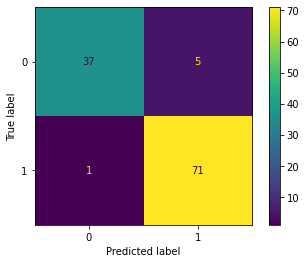

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

# Gradient Boost

## Steps
In this colab we implement Gradient Boosting algorithm and show how it works for regression. Following ate the steps involved:

1. Make a first guess for y_train andy_Test using the averaeg of the y_train
> $y_{trainq0}=\frac{1}{n}\sum_{i=1}^ny_{train_i}$ 

 > $y_{testq0}=y_{train_{q0}}$

2. Calculate the residuals from the training data set
3. Fit a weak learner to the residuals minimizing the loss function. Let's call it $f_0$
4. Increment the predicted y's
5. Repeat the Steps 2 to 4 wntil you reach the number of boosting rounds


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def GradBoost(model, X_train,y_train, X_test,boosting_rounds, learning_rate:float=0.1):
  #make a first guess of our training target variable using the mean of y_train
  y_hat_train = np.repeat(np.mean(y_train),len(y_train))

  #initia;ize thr test predictions with the mean of the training target variable
  y_hat_test = np.repeat(np.mean(y_train),len(X_test))

  #calculate the residuals from the training data using the first guess
  residuals = y_train-y_hat_train

  #iterate through the boosting round
  for i in range(0,boosting_rounds):
    #fit the model to the residuals
    model = model.fit(X_train, residuals)

    #increment the predicted training y with the psuedo residual* learning rate
    y_hat_train = y_hat_train +learning_rate*model.predict(X_train)

    #increment the predicted test y as well
    y_hat_test= y_hat_test+learning_rate*model.predict(X_test)

    #calculate the residuals for the next round
    residuals = y_train-y_hat_train

  return y_hat_train, y_hat_test

WE will create synthetic dataset on which we apply Gradient Boost

In [ ]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=1000,
                      n_features=20,
                      n_informative=15,
                      n_targets=1,
                      bias=0.0,
                      noise=20,
                      shuffle=True,
                      random_state=13)
X_train = X[:800]
y_train=y[:800]
X_test = X[800:]
y_test=y[800:]

The weak learner that we will use is DecisionTreeRegressor with a depth of 3. We can also use other regressors such as linear regression, ridge regression etc.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion='squared_error', max_depth=3)

Let us now see how the squared error reduces as we keep increasing the number of boosting rounds. We will store the errors in a list and will plot further

In [ ]:
mse_train=[]
n_rounds = np.arange(5,101,5)
for n_round in n_rounds:
  y_hat_train = GradBoost(model,
                          X_train,
                          y_train,
                          X_test,
                          boosting_rounds=n_round,
                          learning_rate=0.1)[0]
  print('round #',n_round)
  mse_train.append(np.mean((y_train-y_hat_train)**2))


round # 5
round # 10
round # 15
round # 20
round # 25
round # 30
round # 35
round # 40
round # 45
round # 50
round # 55
round # 60
round # 65
round # 70
round # 75
round # 80
round # 85
round # 90
round # 95
round # 100


Let's plot the reduction in training error wrt the number of boosting rounds.  (We can similarly plot for test_error)

Text(0, 0.5, 'Training Mean Squared Error')

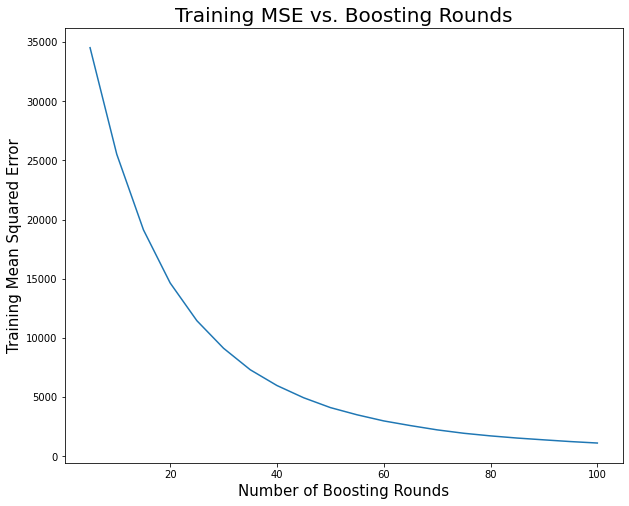

In [ ]:
plt.rcParams['figure.figsize']=(10,8)

plt.plot(n_rounds, mse_train)
plt.title('Training MSE vs. Boosting Rounds',fontsize=20)
plt.xlabel('Number of Boosting Rounds',fontsize=15)
plt.ylabel('Training Mean Squared Error', fontsize=15)

## boosting_rounds=0

We can also compare the actual target values with the predicted values for a given boosting_rounds value. Initially, we consider the mean of y_train values as the prediction. Lets plot that

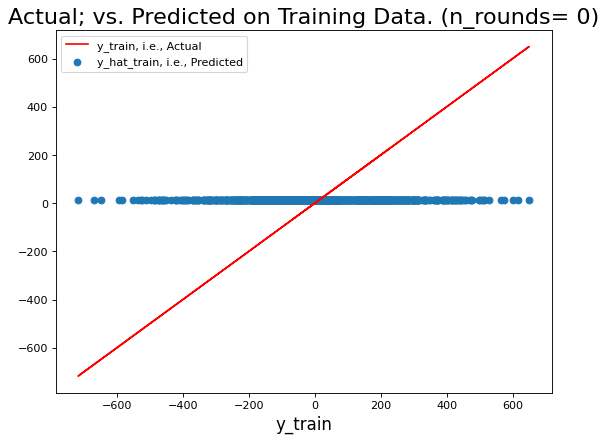

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k')
n_rounds=0
y_hat_train, y_hat_test = GradBoost(model,
                                    X_train,
                                    y_train,
                                    X_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1)
plt.scatter(y_train,y_hat_train,label='y_hat_train, i.e., Predicted')
plt.title('Actual; vs. Predicted on Training Data. (n_rounds= '+str(n_rounds)+')',fontsize=20)
plt.xlabel('y_train',fontsize=15)
plt.plot(y_train,y_train,color='r',label='y_train, i.e., Actual')
plt.legend()

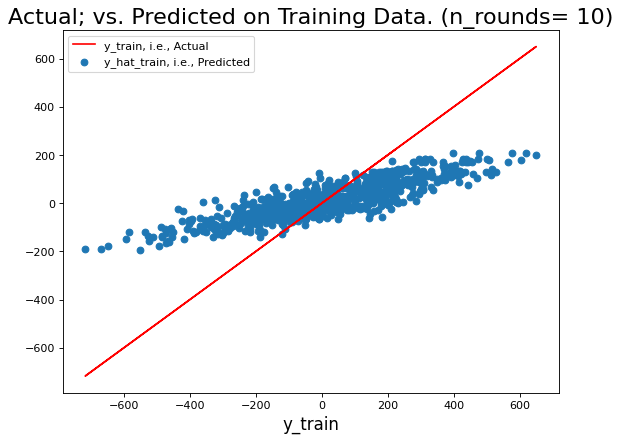

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k')
n_rounds=10
y_hat_train, y_hat_test = GradBoost(model,
                                    X_train,
                                    y_train,
                                    X_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1)
plt.scatter(y_train,y_hat_train,label='y_hat_train, i.e., Predicted')
plt.title('Actual; vs. Predicted on Training Data. (n_rounds= '+str(n_rounds)+')',fontsize=20)
plt.xlabel('y_train',fontsize=15)
plt.plot(y_train,y_train,color='r',label='y_train, i.e., Actual')
plt.legend()

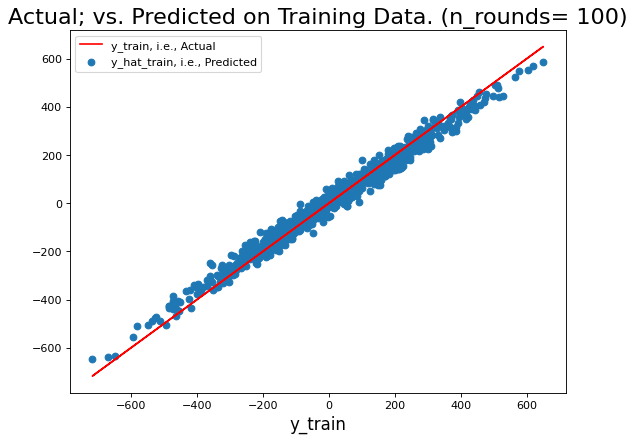

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k')
n_rounds=100
y_hat_train, y_hat_test = GradBoost(model,
                                    X_train,
                                    y_train,
                                    X_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1)
plt.scatter(y_train,y_hat_train,label='y_hat_train, i.e., Predicted')
plt.title('Actual; vs. Predicted on Training Data. (n_rounds= '+str(n_rounds)+')',fontsize=20)
plt.xlabel('y_train',fontsize=15)
plt.plot(y_train,y_train,color='r',label='y_train, i.e., Actual')
plt.legend()

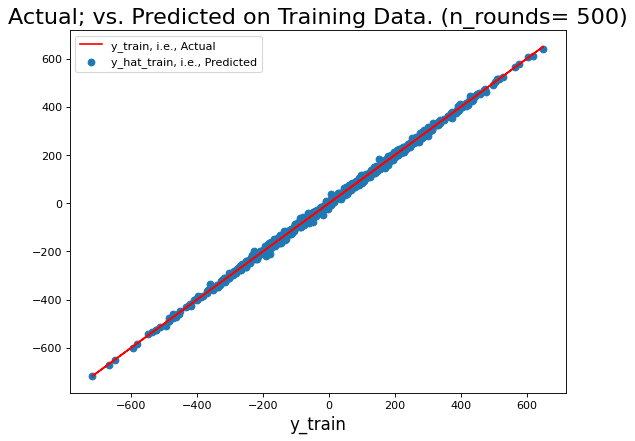

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=80, facecolor='w',edgecolor='k')
n_rounds=500
y_hat_train, y_hat_test = GradBoost(model,
                                    X_train,
                                    y_train,
                                    X_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1)
plt.scatter(y_train,y_hat_train,label='y_hat_train, i.e., Predicted')
plt.title('Actual; vs. Predicted on Training Data. (n_rounds= '+str(n_rounds)+')',fontsize=20)
plt.xlabel('y_train',fontsize=15)
plt.plot(y_train,y_train,color='r',label='y_train, i.e., Actual')
plt.legend()

In [ ]:
# Compute error rate, alpha and w
def compute_error(y, y_pred, w_i):
    '''
    Calculate the error rate of a weak classifier m. Arguments:
    y: actual target value
    y_pred: predicted value by weak classifier
    w_i: individual weights for each observation
    
    Note that all arrays should be the same length
    '''
    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

def compute_alpha(error):
    '''
    Calculate the weight of a weak classifier m in the majority vote of the final classifier. This is called
    alpha in chapter 10.1 of The Elements of Statistical Learning. Arguments:
    error: error rate from weak classifier m
    '''
    return np.log((1 - error) / error)

def update_weights(w_i, alpha, y, y_pred):
    ''' 
    Update individual weights w_i after a boosting iteration. Arguments:
    w_i: individual weights for each observation
    y: actual target value
    y_pred: predicted value by weak classifier  
    alpha: weight of weak classifier used to estimate y_pred
    '''  
    return w_i * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))

In [ ]:
# Define AdaBoost class
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []

    def fit(self, X, y, M = 100):
        '''
        Fit model. Arguments:
        X: independent variables - array-like matrix
        y: target variable - array-like vector
        M: number of boosting rounds. Default is 100 - integer
        '''
        
        # Clear before calling
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        # Iterate over M weak classifiers
        for m in range(0, M):
            
            # Set weights for current boosting iteration
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  # At m = 0, weights are all the same and equal to 1 / N
            else:
                # (d) Update w_i
                w_i = update_weights(w_i, alpha_m, y, y_pred)
            
            # (a) Fit weak classifier and predict labels
            G_m = DecisionTreeClassifier(max_depth = 1)     # Stump: Two terminal-node classification tree
            G_m.fit(X, y, sample_weight = w_i)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m) # Save to list of weak classifiers

            # (b) Compute error
            error_m = compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)

            # (c) Compute alpha
            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)